### Using the Ising Animation as an Example for Conway

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ipywidgets import interact

%matplotlib inline

In [2]:
class Grid:
    """ The grid world on which Conway's GoL lives """
    
    def __init__(self, height, width, random=False):
        self.h = height
        self.w = width
        if random:
            self.state = np.random.randint(0,2, size=(height, width))
        else:
            self.state = np.zeros((height, width))
    
    # function for plotting using Image from PIL
    def display_grid(self):
        return Image.fromarray(np.uint8((self.state) * 255))
    
    def show_grid(self):
        plt.imshow(self.state)
        
    def activate_unit(self, h, w):
        self.state[h,w] = 1
    
    def get_neighbors(self, height, width):
        right = max(0, (width-1))
        left = min(self.state.shape[1], (width+1+1))
        top = max(0, (height-1))
        bottom = min(self.state.shape[0], (height+1+1))
        neighbors = self.state[top:bottom, right:left]
        return neighbors
        
    def iter_world(self):
        for h in range(self.h):
            for w in range(self.w):
                neighbors = self.get_neighbors(h, w)
                if self.state[h,w] == 0:
                    if np.sum(neighbors) == 3:
                        self.state[h,w] = 1
                else:
                    if np.sum(neighbors) in [2, 3]:
                        pass
                    else:
                        self.state[h,w] = 0

In [3]:
my_grid = Grid(50, 50, random = True)

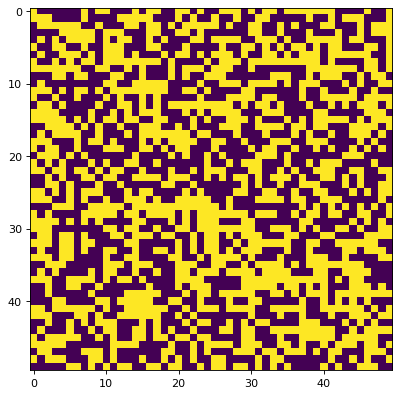

In [4]:
plt.figure(figsize=(6,6), dpi=80)
my_grid.show_grid()

In [5]:
def display_sequence(images):
    def _show(frame=(0, len(images)-1)):
        return plt.imshow(images[frame] * 255)
    return interact(_show)

In [8]:
my_grid = Grid(50, 50, random = True)
grids = [my_grid.state]
for i in range(10):
    my_grid.iter_world()
    grids.append(my_grid.state.copy())

In [9]:
display_sequence(grids)

interactive(children=(IntSlider(value=5, description='frame', max=10), Output()), _dom_classes=('widget-intera…

<function __main__.display_sequence.<locals>._show(frame=(0, 10))>